## Laboratorio # 2
Nombre

In [1]:
import sys
print(sys.executable)

/opt/conda/bin/python


In [2]:
!python --version

Python 3.11.7


In [3]:
!dir

Laboratorio\ 2\ Calidad\ del\ Vino.ipynb  roc_auc_curve.png
Laboratorio\ 2_\ MLFlow.ipynb		  winequality-red.csv
confusion_matrix.png


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,log_loss, confusion_matrix, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV

import mlflow

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
def load_data(path):
    data = pd.read_csv(path, sep=";")
    return data
    
def data_cleaning(data):
    print("Valores nan en los datos:", data.isna().sum())
    data = data.dropna()
    print("Valores nan después de eliminar filas con datos vacios", data.isna().sum())
    return data

def preprocessing(data):
    data['label'] = data['quality'].apply(lambda x: 1 if x >= 5 else 0)
    return data

def data_train_test_split(final_data):
    X = final_data.drop(['quality', 'label'], axis=1)
    y = final_data['label']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [7]:
def training_basic_classifier(X_train,y_train):
    model = RandomForestClassifier(n_estimators=101)
    model.fit(X_train, y_train)
    return model

def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

def get_metrics(y_true, y_pred, y_pred_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

def create_roc_auc_plot(y_test, y_pred):
    RocCurveDisplay.from_predictions(y_test, y_pred)
    plt.savefig('roc_auc_curve.png')

def create_confusion_matrix_plot(y_test, y_pred, labels):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=labels)
    plt.savefig('confusion_matrix.png')

In [8]:
def preprocess_train(dataset):
    data = load_data(dataset)
    cleaned_data = data_cleaning(data)
    final_data = preprocessing(cleaned_data)
    X_train, X_test, y_train, y_test = data_train_test_split(final_data)
    model = training_basic_classifier(X_train,y_train)
    return model, X_train, X_test, y_train, y_test

In [9]:
model, X_train, X_test, y_train, y_test = preprocess_train('winequality-red.csv')

Valores nan en los datos: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Valores nan después de eliminar filas con datos vacios fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Predicciones con el subconjunto de evaluación:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

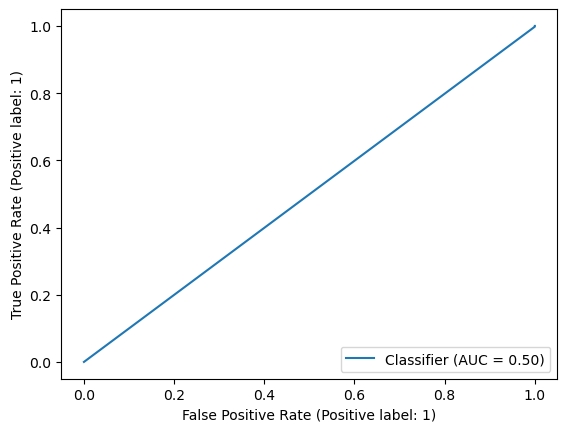

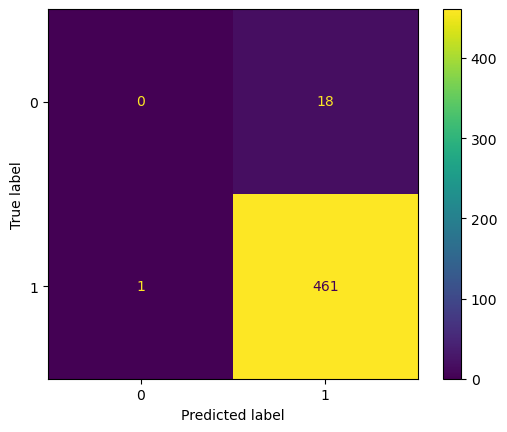

In [10]:
def predict_evaluate(model, X_test, y_test):
  print("Predicciones con el subconjunto de evaluación:")
  y_pred = predict_on_test_data(model, X_test)
  print(y_pred)
  print("Dist. de probabilidades de predicción con el subconjunto de evaluación:")
  y_pred_prob = predict_prob_on_test_data(model, X_test) #model.predict_proba(X_test)
  print(y_pred_prob)
  print("Métricas del modelo:")
  run_metrics = get_metrics(y_test, y_pred, y_pred_prob)
  create_roc_auc_plot(y_test, y_pred)
  create_confusion_matrix_plot(y_test, y_pred, model.classes_)

  return run_metrics

run_metrics = predict_evaluate(model, X_test, y_test)

In [11]:
def create_exp_and_register_model(experiment_name,run_name,run_metrics,model,confusion_matrix_path = None,
                      roc_auc_plot_path = None, run_params=None):

    # mlflow.set_tracking_uri("http://0.0.0.0:5001")
    # mlflow.set_tracking_uri("http://mlflow:5001")
    mlflow.set_tracking_uri("file:/workspace/mlruns")
    mlflow.set_experiment(experiment_name)

    with mlflow.start_run(run_name=run_name) as run:
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])

        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])

        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_matrix')

        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")

        mlflow.set_tag("Laboratorio", "Calidad de Vino")

        # Incluimos esta linea
        mlflow.sklearn.log_model(model, artifact_path="model")
        # mlflow.sklearn.log_model(model, "model",registered_model_name="randomforest-classifier")


In [12]:

experiment_name = "laboratorio_model_registry"
run_name = "pca_aplicado"

create_exp_and_register_model(experiment_name, # Nombre del experimento
                  run_name, # Nombre de la ejecución
                  run_metrics, # Métricas obtenidas
                  model, # Modelo ajustado
                  'confusion_matrix.png', # Ruta a la imagen de la mátriz de confusión
                  'roc_auc_curve.png', # Ruta a la imagen de la gráfica AUC
                  run_params = {"n_estimators":101} # Parametros utilizados al entrenar el modelo
                 )

2025/08/11 13:52:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/11 13:52:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [16]:
import mlflow
mlflow.set_tracking_uri("http://mlflow:5000")
mlflow.set_experiment("laboratorio_model_registry")


2025/08/11 13:53:32 INFO mlflow.tracking.fluent: Experiment with name 'laboratorio_model_registry' does not exist. Creating a new experiment.


<Experiment: artifact_location='/workspace/mlruns/1', creation_time=1754920412968, experiment_id='1', last_update_time=1754920412968, lifecycle_stage='active', name='laboratorio_model_registry', tags={}>

In [18]:
import mlflow
import mlflow.sklearn as msk
from mlflow.tracking import MlflowClient
from time import sleep

mlflow.set_tracking_uri("http://mlflow:5000")
mlflow.set_experiment("laboratorio_model_registry")

with mlflow.start_run() as run:
    msk.log_model(model, name="model")      # MLflow 3.x -> usa name=
    model_uri = f"runs:/{run.info.run_id}/model"
    print("model_uri:", model_uri)

client = MlflowClient()
registered = mlflow.register_model(model_uri, name="randomforest-classifier")

# Poll hasta READY con logs
for i in range(60):
    mv = client.get_model_version("randomforest-classifier", registered.version)
    print(f"[{i}] Estado: {mv.status}")
    if mv.status == "READY":
        break
    sleep(2)

client.set_registered_model_alias(
    name="randomforest-classifier",
    alias="Champion",
    version=int(registered.version),
)

2025/08/11 13:55:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'randomforest-classifier'.
2025/08/11 13:55:47 WARNING mlflow.tracking._model_registry.fluent: Run with id 23b6c22522d34cb9a1ac3249627c718a has no artifacts at artifact path 'model', registering model based on models:/m-83e753331cef4788a0d3270534fb1cb5 instead
2025/08/11 13:55:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: randomforest-classifier, version 1


model_uri: runs:/23b6c22522d34cb9a1ac3249627c718a/model
🏃 View run dapper-finch-819 at: http://mlflow:5000/#/experiments/1/runs/23b6c22522d34cb9a1ac3249627c718a
🧪 View experiment at: http://mlflow:5000/#/experiments/1
[0] Estado: READY


Created version '1' of model 'randomforest-classifier'.


In [19]:
import mlflow.pyfunc

model_name = "randomforest-classifier"
alias = 'Champion'  # Alias previamente asignado a una versión del modelo

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}@{alias}"
)

y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
